# Adversarial Machine Learning Tutorial
## GRAD-E1394 Deep Learning -- Assignment 3
Authors:
*   Dinah Rabe, d.rabe@students.hertie-school.org
*   Johannes Halkenhäußer, j.halkenhaeusser@students.hertie-school.org
*   Benedikt Ströbl, b.stroebl@students.hertie-school.org
*   Victor Möslein, v.moeslein@students.hertie-school.org


This tutorial provides users with a fundamental understanding for Adversarial Machine Learning (AML), why it is dangerous, and how its risks can be mitigated. It does so by providing both mathematical and theoretical explanations as well as hands-on coding examples. Two attacks and their countermeasures are implemented, namely an evasion attack and a membership inference attack. The user will be introduced not only in the intricacies of these attacks but get an idea of their risks in general. Machine Learning systems applied in all domains can be subject to adversarial attacks, making the topic paramount to practitioners and policy-makers alike.

<a href="https://colab.research.google.com/github/hertie-data-science-lab/assignment-3---tutorial-adversarial-attacks/blob/main/tutorial_adversarial_attacks.ipynb" target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width="200px"/></a>

# Table of Contents


*   [Memo](#memo)
*   [Overview](#overview)
*   [Background & Prerequisites](#background-and-prereqs)
*   [Introduction Video](#video)
*   [Reading Materials](#reading-materials)
*   [Attack 1: Membership Inference Attack](#attack1)
    *   [Software Requirements](#software1)
    *   [Data Description](#data-description1)
    *   [Data Download](#data-download1)
    *   [Introduction to Membership Inference Attacks](#introduction1)
    *   [Data Preprocessing](#data-preprocessing1)
    *   [The Attack](#the-attack1)
        *   [The Target Model](#targetmodel)
        *   [The Shadow Models](#shadowmodels)
        *   [The Attack Models](#attackmodels)
    *   [Results & Discussions](#results-and-discussion1)
    *   [Epilogue: Mitigation Strategies](#mitigation1)
    *   [Limitations](#limitations1)
*   [Attack 2: Evasion Attack or The Power of Adverserial Examples](#attack2)
    *   [Software Requirements](#software2)
    *   [Data Description](#data-description2)
    *   [Data Download](#data-download2)
    *   [Introduction to Membership Inference Attacks](#introduction2)
    *   [Data Preprocessing](#data-preprocessing2)
    *   [The Attack](#the-attack2)
        *   [The Target Model](#targetmodel2)
        *   [A Non-Targeted Attack](#nontargetedattack)
        *   [A Targeted Attack](#targetedattack)
    *   [Limitations](#limitations2)
        
*   [Next Steps](#next-steps)
*   [References](#references)

<a id="memo"></a>
# Memo

As we seek to incorporate the possibilities of Machine Learning (ML) and Deep Learning (DL) models into policy making, for example to enhance service provision or to support evidence-based policy making, we have to be aware and prepared to mitigate potential risks. While we extensively discuss whether a system is reliable and its use ethically justifiable, we omit the growing risk of adversarial attacks by malicious actors on deployed ML models and therefore their adversarial robustness. Adversarial Machine Learning (AML) comprises all possible attacks that ML and DL systems can be subject to. In a policy context this could be, e.g. an adversary actor trying to extract sensitive public records (e.g health data) that were used as training data or a tax evader that does not want to be convicted by a fraud detection model deployed by the tax authorities.

[Chakraborty et al.](https://doi.org/10.1049/cit2.12028) nicely summarise previous research on both the variety of adverserial attacks and potential defences including practical examples. One of the known real-world examples of such attacks is the TwitterBot Tay launched by Microsoft in 2016. It was trained with its interactions with other twitter users, who quickly found out, that they could adversely affect the learning of the Bot through their own tweets. Only one day after its launch the bot itself started to tweet racist and antisemitic tweets and was suspended by [Microsoft](https://techpolicy.org.il/blog/adversarial-machine-learning-research-developments-dangers-and-implications/). It cleary demonstrated the possbility to manipulate and disrupt a model even without knowing anything about the model architecture and parameters.

While slowly acknowledging the growing threat, [governments](https://science.house.gov/imo/media/doc/Schmidt%20Testimony%20Attachment.pdf) and [think tanks](https://www.c4isrnet.com/artificial-intelligence/2019/09/10/the-3-major-security-threats-to-ai/) admit, that only “a very small percentage of current AI research goes toward defending AI systems against adversarial efforts" even though they see additional safety needs for publicy deployed systems. But also industry is struggeling to adequately adapt to the challenge. A Microsoft survey in 2020 found that even security analysts believe that risk to ML systems is a concern of the future. As a reaction to these findings Microsoft and the nonprofit MITRE, with contributions from 11 organizations including IBM, NVIDIA, Bosch, released a framework called ["Adverserial ML Threat Model"](https://www.microsoft.com/en-us/security/blog/2020/10/22/cyberattacks-against-machine-learning-systems-are-more-common-than-you-think/) to supply industry security experts with knowledge about techniques employed by malicious adversaries. Public institutions acknowledged the risks of AML explicitly for the first time within the proposal for the [AI Act](https://digital-strategy.ec.europa.eu/en/library/proposal-regulation-laying-down-harmonised-rules-artificial-intelligence) which states that providers of high-risk AI must ensure “where appropriate measures to prevent and control” adversarial attacks. It is however unclear how providers of AI systems can comply with such regulation. For policy makers, public and private providers it remains as an open problem to come up with a considerably robust design against these adversarial attacks and policies that demand and support the development and use of tools to protect data, models and infrastructure.



<a id="overview"></a>
# Overview

With our [presentation](https://github.com/hertie-data-science-lab/assignment-3---tutorial-adversarial-attacks/tree/main/Presentation) we theoretically introduced the topic of Adversarial Machine Learning (AML), key concepts, terminology and its policy relevance. With this tutorial, we provide the user with a hands-on and step-by-step guide through two specific adversarial attacks and a mitigation strategy. Our main goal is to introduce the user to the *the adversarial perspective* and ideally trigger her/him to rethink and broaden her/his understanding and thinking of robustness in machine learning. This will be a crucial skill for anyone who wants to enhance and enable the safe use of machine learning in the the policy context with its especially high safety requirements, as adversarial attacks are a growing threat and continuously developing.

This tutorial has two main parts, each representing an adversarial attack: In the first part we walk the user through a membership inference attack, an example for a black-box attack, and in the second part, we guide the user through a white-box evasion attack. For both attacks types there are various potential threat scenarios in the public sphere which hopefully make our tutorial both more interesting and transferable.

For each attack, we start with a brief theoretical introduction and then proceed with the coding of the attack. You might find it counterintuitive to put the focus on the attacks themselves, but we are convinced that given the limited scope of the tutorial, an introduction to the logic of the attacks is more powerful for triggering an understanding of adversarial thinking and robustness. To not leave the user hopeless or devastated, we provide an exemplary defense for the first attack and further resources on the wide range of other potential defenses. 

Our tutorial lets the user revisit and newly discover fundamental concepts of machine learning and reminds us that models can neither think nor are they sentient, but that they really only operate on gradients and loss functions.

<a id="background-and-prereqs"></a>
# Background & Prerequisites

A basic understanding of machine learning concepts is required for this tutorial. The reader should be familiar with the basic machine learning process. It is important to know the difference between training and test sets, the basics of how the backpropagation algorithm works, what overfitting means. Obviously, this naturally demands a good understanding of calculus and linear algebra.

For understanding the mitigation strategies in defense against adversarial attacks, it is advisable to acquaintance yourself with the fundamental principle of Regularization -- L2-Regularization (Ridge) in particular.

**Training/Testing Set.** For training and evaluating a machine learning model, we need to divide our data into at least two subsets -- training and test set. Doing this allows the developer to train their model on the training set and then test it on the separate test data. Hence, we can evaluate how well a model generalizes on new, previously unseen, data.

**Loss Function.** To evaluate how good our machine learning algorithm has learned our data set, we use loss functions (sometimes also called cost or error functions). During training we try to minimize the loss between the predicted and actual outputs. There are different loss functions available, e.g. MSE (Mean Squared Error) for regression models or Categorical Cross Entropy Loss for Classification. We will use the latter one in both attacks and will demonstrate how important loss functions for AML are.

**Backpropagation.** The backpropagation algorithm is used during model training and refers to the step of calculating the gradient with respect to a loss function for updating the parameters (weights) of the model. We will build in this concept when determining a model's sensitivity with respect to changes in the input data.

**Overfitting.** Simply speaking, overfitting describes the situation in which a model does not generalize well, as a result of fitting the training data too good -- thus it performs much better on the training data than the test set. In more technical terms, an overfit model has learned the noise in the training data instead of the true signal. Overfitting will be an important concept to understand why our attacks work so well.

**L2-Regularization.** Regularization, on the other hand, refers to the techniques that can be used to prevent overfitting, hence forcing the model to stay *artificially* simpler. This is often done -- as in the case of L2-Regularization -- by adding an extra term to the loss function that penalizes high parameter values.

Of course, this is not an exhaustive list that covers all the details that might be useful to understand this tutorial. However, understanding these concepts will equip the reader with the necessary knowledge to engage with the following content and allow for further research in case there are still open questions.

<a id="video"></a>
# Video

This video gives an easy introduction into AML:

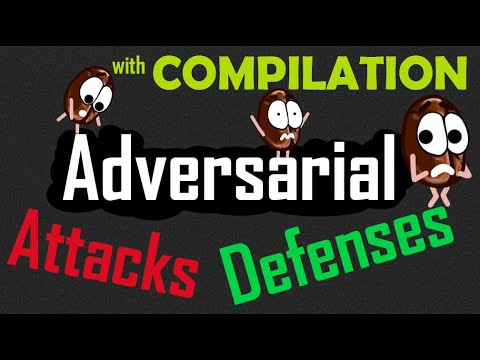

In [ ]:
# Introduction video to adversarial attacks

from IPython.display import YouTubeVideo
YouTubeVideo('YyTyWGUUhmo')

<a id="reading-materials"></a>
# Reading Materials

With this tutorial we want to provide you an extensive primer on Adversarial Machine Learning and some of the most central concepts at the heart of this field. Hence, we also want to equip the interested readers with resources enabling guided self-studying. You find a curated list of resources that are in part the basis of this notebook, but also provide an opportunity to investigate the topic beyond the references introduced below.

*   [Research paper on membership inference attacks](https://arxiv.org/abs/1610.05820): Shokri, R., Stronati, M., Song, C., & Shmatikov, V. (2017, May). 
*   [Survey of adversarial attacks and defences](https://ietresearch.onlinelibrary.wiley.com/doi/epdf/10.1049/cit2.12028): Chakraborty, A., Alam, M., Dey, V., Chattopadhyay, A., & Mukhopadhyay, D. (2018). 
*   [Overview of attack types](https://viso.ai/deep-learning/adversarial-machine-learning/) by Viso.ai
*   [Very extensive tutorial on "Adverserial Robustness: Theory and Practice"](https://adversarial-ml-tutorial.org/) from the NeurIPS Conference 2018.
*   [Tutorial on implementing an adverserial attack using adverserial examples](https://www.tensorflow.org/tutorials/generative/adversarial_fgsm) by tensorflow (basis for Attack 2 of this tutorial)


<a name="attack1"></a>
# Attack 1: Membership Inference Attack

In this first example, a Membership Inference Attack is implemented. In this scenario, the attacker has **no information about the machine learning model itself** and thus only has black-box access to it - that is, the attacker can query the model with inputs and can retrieve the outputs of the model. The goal of the attacker is to get information about whether a data point was part of the dataset the model was trained on, or in other words: to **infer** whether a datapoint was a **member** of the training set. This is possible because, as we will see, machine learning models can be exploited so that they leak the information of whether an individual datapoint was used for its training or not.

One can easily see the **relevance** of understanding how such attacks work - and how to mitigate the risks of being subject to such an attack oneself. For example, **in the health care context**, if a machine learning model is used to predict the best procedure for a given medical condition, such an attack would allow rogue actors to infer whether a person was part of the original dataset used for training the model, that is, **whether a person suffers from such a condition**. Imagine employers or health insurance companies using such a method to find out whether an applicant for a job or an insurance product has an illness they would not have wanted to disclose.

The original idea for such an attack is from researchers at Cornell Tech (see source). In their paper "Membership Inference Attacks Against Machine Learning Models" they implement attacks for various different datasets and machine learning models, including purchase recommendations, locations of individuals, hospital stays, and incomes, and come to a similar conclusion for all of them: models are inherently vulnerable to membership inference attacks. However, several factors influence this leakage and **mitigation strategies** exist to counteract the risk of such an attack to machine learning models.

**Source**: Shokri, R., Stronati, M., Song, C., & Shmatikov, V. (2017, May). Membership inference attacks against machine learning models. In 2017 IEEE symposium on security and privacy (SP) (pp. 3-18). IEEE. Available at: https://arxiv.org/abs/1610.05820

<a id="software1"></a>
## Software Requirements

In order to run this first part of the tutorial, you need to install the following the dependencies. We recommend running this in **Google Colab with a GPU runtime**. 

Doing this will not require to install any dependencies since all the required libraries are already installed on Colab runtimes.

However, if you want to run this locally, we recommend to install the latest Python version (3.10). Moreover, the following libraries are required:
*   tensorflow
*   scikit-learn
*   matplotlib
*   numpy
*   random

You can install these by running the following cell on your local machine. 

**Note:** You may need to replace *%* with an *!* depending on your operating system or runtime setup.

In [35]:
%pip install tensorflow numpy matplotlib scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


You can check whether all required dependencies are installed successfully on your system by importing the libraries with the cell below.

In [36]:
# Machine learning models and data
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, metrics, optimizers, regularizers

# Additional libraries needed for creating random samples
from sklearn.utils import shuffle
import random

# Data and image visualization
import matplotlib.pyplot as plt
from IPython import display

# Data manipulation
import numpy as np

# Load custom stylesheet for plots
plt.style.use('https://raw.githubusercontent.com/benediktstroebl/hosted-files/main/custom_style.mplstyle')

# Set seed
random.seed(42)

<a id="data-description1"></a>
## Data Description

The method that we are presenting to show how attackers can infer whether a data point was part of the original dataset works **irrespective of which data exactly was being used**. As we want to show a tangible example which is realistic yet balances the pedagogical insights with performance limitations and ethical considerations, we use a simple publicly available image dataset consisting of pictures of objects and animals.

Specifically, the **CIFAR-10** dataset has a total of ten classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). There are in total 60,000 images that are evenly distributed between the classes. The dataset is pre-split into 50,000 training images and 10,000 test images. All images have the same 32x32 resolution with three bands for the RGB colors.

The dataset is available at https://www.cs.toronto.edu/~kriz/cifar.html 

**Source**: A. Krizhevsky, “Learning multiple layers of features from tiny images,” Master’s thesis, University of Toronto, 2009. Available at: https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf 

 

<a id="data-download1"></a>
## Data Download

Tensorflow has the CIFAR-10 dataset built-in, which allows us to easily download it with one command. Since we don't need the train/test split already included in the dataset, we first combine it to have one large dataset.

In [37]:
# Load CIFAR-10 data and start with combining the train and test splits
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
images = np.concatenate((train_images,test_images),axis = 0)
labels = np.concatenate((train_labels, test_labels), axis = 0)

170498071/170498071 [==============================] - 3s 0us/step


<a id="introduction1"></a>
## Introduction to Membership Inference Attacks

Before we move on, we need to dive deeper into how Membership Inference Attacks actually work. Please bear with us here: of course AML is not a trivial field - *luckily*, because if attacking ML models would be super easy, it would mean that ML is generally badly conceived in the first place. 

Since we are taking the role of the attacker, let's recap what we know and what we don't know about the model we are attacking: 
**We don't know anything about how the model that we are trying to attack works**, but **we do know what kind of data it takes in which format, and that it classifies those inputs into confidence scores for each class**. We can retrieve the confidence scores as the output of the model. For each input, the model gives us one confidence score per class.

Our **goal** is to create a model which makes a simple two-class classification into whether an image was **in the training set of the model we are attacking or not.**

In order to better understand how to move forward, we need to specifiy important terms:
*   **Target model**: This is the model that we are trying to attack.
*   **Attack models**: These are the models that we are using to attack the target model. We need as many attack models as the target model has output classes because the target model's output classes generally have different distributions for each input class.

But that's not all: the **attack models** of course also have to be trained. 
Specifically, they need to be created in such a way that they can **recognize differences in the outputs of the target model** depending on whether a data point was part of its training set or not. In order to do this, we exploit one of the main weaknesses of ML models: namely, that they oftentimes **behave differently on data that they are confronted with for the first time than on the data they already know from their training**, e.g. due to *overfitting* to the training data.

To do this, we create **shadow models** that we believe to behave similar to the target model. Because we know which images are part of the training set of the shadow models and which aren't, the shadow models can perform supervised learning to be able to predict the classes of input images. We can train arbitrarily many shadow models. With more shadow models, the prediction accuracy increases but so does the required computational capacity.

What we get from the shadow models is an *idea* of the **differences in the output of a model depending on whether a datapoint was a member of the training set or not**, i.e. a representation of the different distributions of output classes for members and non-members. While we don't need this information per se, we need the outputs of the shadow models, including the predictions, classes, and whether the image was in its training set or not, to train the attack models. But more on that as we go along...

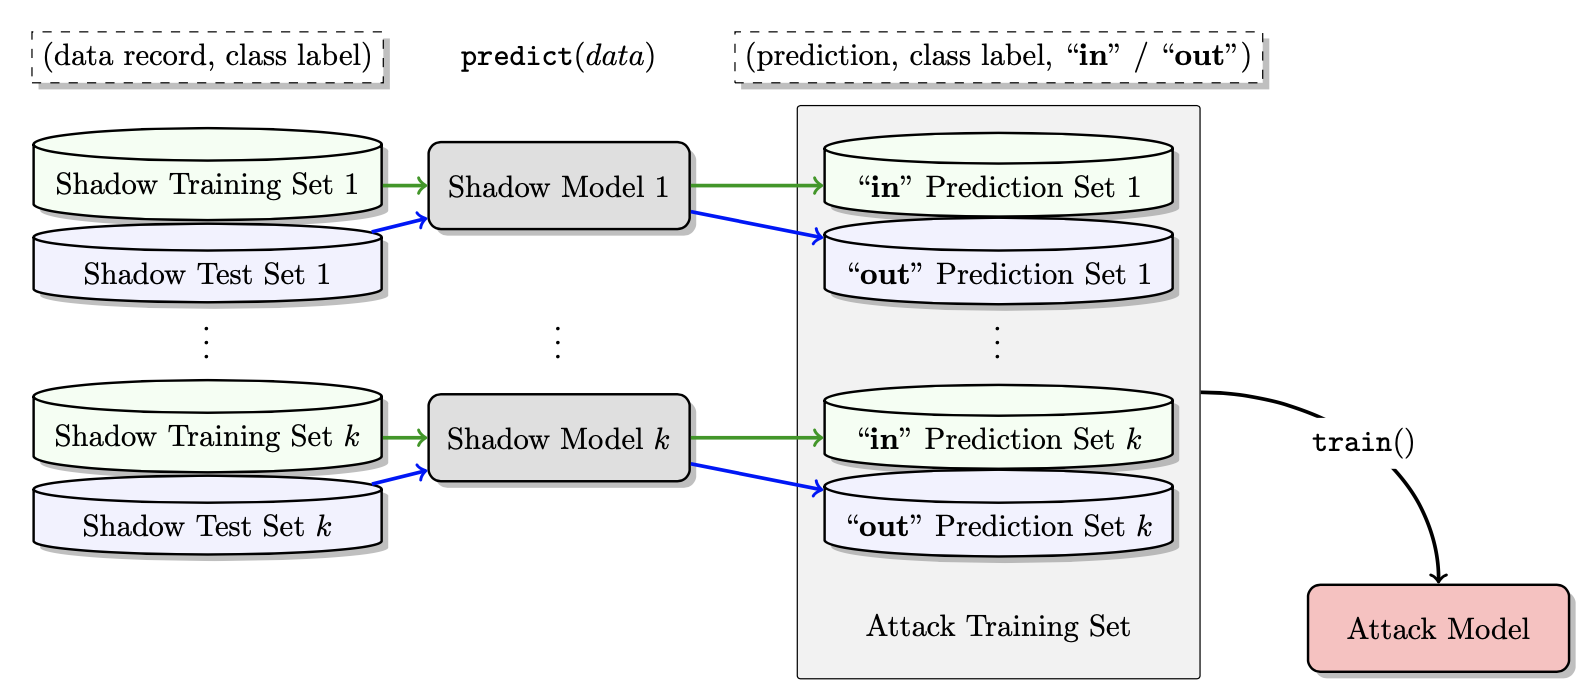

In [38]:
# Show image on shadow models and attack model training sets
display.Image("https://github.com/benediktstroebl/hosted-files/raw/cec214a70eca84fd0e8a8c0761d6b1d9ad65e980/MembershipInferenceAttack_Shadow_Models.png", height=400)

**Figure 1**: Training and test sets for the shadow models and attack models.

Image source: Shokri, R., Stronati, M., Song, C., & Shmatikov, V. (2017, May). Membership inference attacks against machine learning models. In 2017 IEEE symposium on security and privacy (SP) (pp. 3-18). IEEE. Available at: https://arxiv.org/abs/1610.05820

Figure 1, which is from the original research paper, gives an overview of the different datasets required, and the connection between the shadow models and the attack models. The k shadow models each have a known training and test set, which are disjoint for each model but can overlap between the shadow models. The attack training set consists of the predictions of the shadow model, the class labels and an extra column indicating whether the image was part of the shadow model's training set **("in")** or its test set **("out")**.

<a id="data-preprocessing1"></a>
## Data Preprocessing

In this tutorial, we have one dastaset which we split into the dataset for the target model and another which we use to train the shadow models. That is obviously a **simplification** of the real-world case where there does not exist one dataset which is sliced up for the attacker and the target. 

However, this simplification is not totally unrealistic: we can think of the shadow dataset and the target datasets as **two disjoint sets** of images of faces or animals, or even health records which have nothing in commen except for the number of classes and the dimensions. By having shuffled our data and then picking random images for the non-overlapping shadow and target sets, we have exactly the same outcome.

A different scenario would be the one where the attacker does not even know what kind of data the target model was trained on, for example whether they were pictures of humans or animals or something else altogether. In that case, the attacker would need to *guess* the training data of the target model. This could be achieved by a method called **"Model-based synthesis"** which bascially means that the attacker queries the target model with random input and takes those data points for the dataset of the shadow models that are classified with high confidence scores.

If the attacker has some statistical knowledge about the population from which the training data of the target model originates, the attacker can simply draw samples from that same distribution for the training data of the shadow models. This method is called **"Statistics-based synthesis"** and could for example be applied if the attacker knows the distribution of socio-economic characteristics in a given region and the target model makes predictions on certain characteristics of that population, such as income.

So enough talking: let's preprocess the data. First, we **normalize** the dataset and then **shuffle** it to ensure the randomness necessary for a realistic attack. 

In [39]:
# Normalize pixel values to be between 0 and 1
images = images / 255.0

# Shuffle our images and labels. This ensures that each model uses a random subset of the data.
images, labels = shuffle(images, labels)

Then we **split the data into different pools**. One pool is for the shadow models and the rest for the target model.  

In [40]:
# Define training/test set size for entire attack scenario
set_size = 3000

# Take train and test set for target model
train_images_target = images[:set_size]
train_labels_target = labels[:set_size]

test_images_target = images[set_size:2*set_size]
test_labels_target = labels[set_size:2*set_size]

# Use remaining (disjoint) samples as pool to draw random samples for each shadow model later (the shadow model train/test sets might overlap between the different shadow models)
images_shadow_pool = images[2*set_size:]
labels_shadow_pool = labels[2*set_size:]

<a id="the-attack1"></a>
## The Attack

Now that we have the data sorted out for now, we need to tackle the machine learning part.

First we define a rather simple machine learning model. We use the exact **same architecture for the target model and the shadow models**.

The model we are using is a basic Convolutional Neural Network (CNN) with two convolutional layers and two max pooling layers, a fully connected layer of size 128 and a SoftMax layer. The activation function used is tanh.

In [41]:
# Define basic CNN model structure
target_model = models.Sequential()
target_model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
target_model.add(layers.MaxPooling2D((2, 2)))
target_model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
target_model.add(layers.MaxPooling2D((2, 2)))
target_model.add(layers.Flatten())
target_model.add(layers.Dense(128, activation='tanh'))
target_model.add(layers.Dense(10, activation='softmax'))

# Print target model structure
target_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_1 (Dense)             (None, 128)              

Of course, there is an **assumption** that we are making here: the attack model and target model have the same structure. However, this does not violate our black-box assumption that the attacker does not know anything about the target model's architecture. In fact, we could also think of our set-up as having an API for a machine learning task (as is getting ever more common thanks to machine learning as a service tools). If the attacker knows which API the target model uses, they can **simply use the same API to train the shadow models**. In our case, the CNN model we have created serves the same purpose as such an API.

<a id="targetmodel"></a>
### The Target Model

We now train the target model on the training and testing datasets specified above. Note that this is **not part of an adversarial attack in the wild**; in an actual attack, the target model would obviously already be trained and deployed. We just do it here so that we have a model we can attack.

In [42]:
def train_target_model(target_model, train_images_target, train_labels_target, test_images_target, test_labels_target, n_epochs=30):
  """
  Trains the target model on the given training data and evaluates it on the given test data.
  """
  target_model.compile(
      optimizer='adam', 
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
  )

  history = target_model.fit(
      train_images_target, 
      train_labels_target, 
      epochs=n_epochs, 
      validation_data=(test_images_target, test_labels_target)
  )

  return target_model, history

(target_model, history) = train_target_model(target_model, train_images_target, train_labels_target, test_images_target, test_labels_target)

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


94/94 [==============================] - 1s 8ms/step - loss: 1.9406 - accuracy: 0.2907 - val_loss: 1.7375 - val_accuracy: 0.3857
Epoch 2/30
94/94 [==============================] - 0s 5ms/step - loss: 1.6270 - accuracy: 0.4253 - val_loss: 1.6693 - val_accuracy: 0.4043
Epoch 3/30
94/94 [==============================] - 0s 5ms/step - loss: 1.4604 - accuracy: 0.4817 - val_loss: 1.6241 - val_accuracy: 0.4307
Epoch 4/30
94/94 [==============================] - 0s 5ms/step - loss: 1.2999 - accuracy: 0.5523 - val_loss: 1.4972 - val_accuracy: 0.4663
Epoch 5/30
94/94 [==============================] - 1s 6ms/step - loss: 1.1529 - accuracy: 0.6107 - val_loss: 1.4483 - val_accuracy: 0.4917
Epoch 6/30
94/94 [==============================] - 1s 5ms/step - loss: 1.0172 - accuracy: 0.6577 - val_loss: 1.4307 - val_accuracy: 0.5113
Epoch 7/30
94/94 [==============================] - 0s 5ms/step - loss: 0.8939 - accuracy: 0.7040 - val_loss: 1.5237 - val_accuracy: 0.4733
Epoch 8/30
94/94 [=============

We quickly evaluate the target's model performance. In this entire tutorial, we are interested in the **accuracy** metric of our models. Accuracy simply shows us the share of correct predictions out of all predictions made.

313/313 - 1s - loss: 5.0437 - accuracy: 0.3566 - 742ms/epoch - 2ms/step


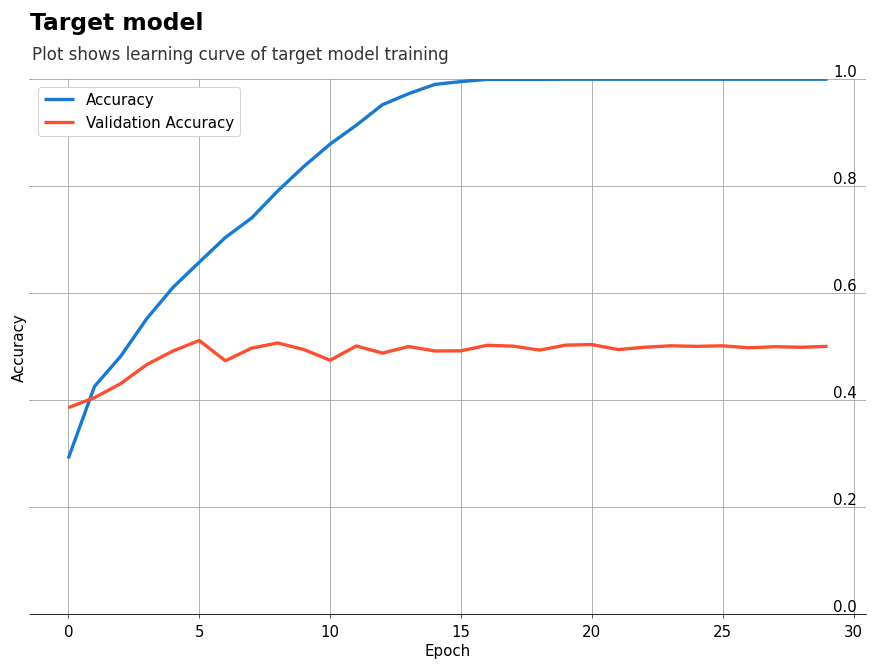

In [43]:
# Create plot with learning curve of target model training

fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label='Accuracy')
ax.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
ax.set_title('Target model')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])
ax.legend(loc='upper left')
ax.text(x=.082, y=.91, 
        s="Plot shows learning curve of target model training", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20, 
        alpha=.8)

test_loss, test_acc = target_model.evaluate(test_images,  test_labels, verbose=2)

We see that our target model trains nicely during the first ten epochs. We also already see quite some overfitting with a training accuracy of 1 after 15 epochs and a stagnating validation accuracy of about 0.5.

<a id="shadowmodels"></a>
### The Shadow Models

As explained, we now train our shadow models, which we need to train the attack models later on. The shadow models have the same architecture as the target model, but do not have any other similarities than that.

In [44]:
# Here we set the number of shadow models for our attack scenario to 40
num_shadow_models = 40

# Create shadow models that all have the exact same structure as the target model (but newly initialized weights)
shadow_models = [models.clone_model(target_model) for i in range(num_shadow_models)]

Now we as the attacker need to create some methods that help us to prepare the datasets of all of the shadow models, as well as compile and train them. 

Firstly, the method which creates the **datasets for training and testing of each shadow model**. These are randomly drawn from the pool created earlier, but training and testing sets for one shadow model can never contain the same image. We then add the information of whether an image is in the training set or the testing set of each shadow model by adding a column with ones or zeros, respectively.

In [45]:
def create_shadow_models_datasets(images_shadow_pool, labels_shadow_pool, num_shadow_models, set_size = set_size):
  """
  This function generates the individual training and test sets for each of our shadow model. 
  It uses the data pool for all shadow model that is disjoint from the target model's data (as defined earlier).
  We draw random samples from this data pool for training and test set of the same size.
  While there might be overlaps in data between the shadow models, we ensure that each shadown model has disjoint training and test sets.
  """
  train_images_shadow = []
  train_labels_shadow = []
  test_images_shadow = []
  test_labels_shadow = []

  for i in range(num_shadow_models):
    # generate random numbers from uniform sample (without duplicates) to select train and test samples
    random_sample = random.sample(population=range(len(images_shadow_pool)), k=2*set_size)
    train_idx = random_sample[:set_size] # take train idx from random numbers
    test_idx = random_sample[set_size:] # take disjoint test idx from random numbers

    # Select train images with random idx just generated from shadow data pool 
    train_images_shadow.append(images_shadow_pool[train_idx])
    # Do the same for train labels but also add new column with In/Out label (train --> 1:In)
    train_labels_shadow.append(np.hstack((labels_shadow_pool[train_idx], np.ones(shape=(set_size,1), dtype='uint8'))))

    # Select test images with random idx just generated from shadow data pool 
    test_images_shadow.append(images_shadow_pool[test_idx])
    # Do the same for test labels but also add new column with In/Out label (test --> 0:Out)
    test_labels_shadow.append(np.hstack((labels_shadow_pool[test_idx], np.zeros(shape=(set_size,1), dtype='uint8'))))

  return (train_images_shadow, train_labels_shadow), (test_images_shadow, test_labels_shadow)

Now we need a method which compiles all shadow models. We use categorical cross-entropy loss for the loss function, as we also did for the target model.

In [46]:
def compile_models(models):
  """
  This function is used to compile all models in a list of models.
  We use this for compiling our shadow and attack models.
  """
  opt = optimizers.SGD(learning_rate=0.01)
  
  for m in models:
    m.compile(
        optimizer=opt, 
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
  return models

The training of the shadow models shall also take place by calling one command, so we create the following method. Note: here we don't yet need the in/out labels, because we want to train the model to do what the target model does, which is **predict the classes**.

In [47]:
def fit_shadow_models(shadow_models, train_images_shadow, train_labels_shadow, test_images_shadow, test_labels_shadow, n_epochs=15):
  """
  This function is used to iterate over all our shadow models and fit them.
  Each of the shadow models is fitted on its respective train/test sets and then returned in its fitted state.
  """
  for idx, m in enumerate(shadow_models):
    print(f'Next Model: {idx+1}/{len(shadow_models)}')
    m.fit(
      train_images_shadow[idx], 
      train_labels_shadow[idx][:,[0]], # train shadow models on class labels not in/out lables 
      epochs=n_epochs, 
      validation_data=(test_images_shadow[idx], test_labels_shadow[idx][:,[0]])
    )

  return shadow_models

Now we use these methods to **create the datasets, compile the shadow models and train them**.

In [48]:
# Call above function to create the datasets for all our shadow models
(train_images_shadow, train_labels_shadow), (test_images_shadow, test_labels_shadow) = create_shadow_models_datasets(
    images_shadow_pool, 
    labels_shadow_pool, 
    num_shadow_models
)

**Note that running the next cell takes some time (~ 9 minutes)** So let the shadow models train and use the time to go back to the beginning of the tutorial and re-read the introduction or watch the video to familiarize yourself with AML if you haven't already. After this step, it will be essential to have understood how Membership Infernce Attacks work, as the attack itself will unfold.

In [49]:
# Compile shadow models
shadow_models = compile_models(shadow_models)

# Iterate over shadow models and fit each of them on its respective data sets
# NOTE: This cell takes approximately ~ 9 min. to run. Watch our video or read the accompanying memo :-)
shadow_models = fit_shadow_models(
    shadow_models,
    train_images_shadow,
    train_labels_shadow,
    test_images_shadow, 
    test_labels_shadow
)

Next Model: 1/40
Epoch 1/15
94/94 [==============================] - 1s 7ms/step - loss: 2.2521 - accuracy: 0.1583 - val_loss: 2.1886 - val_accuracy: 0.1843
Epoch 2/15
94/94 [==============================] - 0s 5ms/step - loss: 2.1085 - accuracy: 0.2460 - val_loss: 2.0497 - val_accuracy: 0.2557
Epoch 3/15
94/94 [==============================] - 0s 5ms/step - loss: 1.9813 - accuracy: 0.3020 - val_loss: 1.9438 - val_accuracy: 0.3027
Epoch 4/15
94/94 [==============================] - 0s 5ms/step - loss: 1.9042 - accuracy: 0.3280 - val_loss: 1.9056 - val_accuracy: 0.3350
Epoch 5/15
94/94 [==============================] - 0s 5ms/step - loss: 1.8462 - accuracy: 0.3540 - val_loss: 1.8630 - val_accuracy: 0.3327
Epoch 6/15
94/94 [==============================] - 0s 5ms/step - loss: 1.8072 - accuracy: 0.3847 - val_loss: 1.8258 - val_accuracy: 0.3510
Epoch 7/15
94/94 [==============================] - 0s 5ms/step - loss: 1.7702 - accuracy: 0.3923 - val_loss: 1.7861 - val_accuracy: 0.3717
Epo

<a id="attackmodels"></a>
### The Attack Models

Since we now have the shadow models, we need to define and create the attack models in the next step.

Firstly, we define a method that creates the dataset for the attack models. As explained above, we need **one attack model per output class**. This means that we also need **one dataset with the predictions of all shadow models for each class**. This dataset is the training set for the attack model of that class. In order to get this dataset, we combine the confidence scores for the predictions on the training and test data for each shadow model with the image's actual class label and the label for whether its in the training or the testing set.

In [50]:
def build_attack_model_data(shadow_models, train_images_shadow, train_labels_shadow, test_images_shadow, test_labels_shadow):
  """
  This function is used to create the data sets that are required for fitting the attack models.
  For each shadow model, we compute its predictions on its training and test data. 
  We combined the resulting confidence scores with the true label for each data point and the In/Out label for training/test set.
  We than split the data by the classes and in attack_X and attack_Y denominating the input and labels for the attack models training.
  """
  attack_x = []
  attack_y = []

  for idx, m in enumerate(shadow_models):
    # Get shadow model's data and combine train/test data
    images = np.vstack((train_images_shadow[idx], test_images_shadow[idx]))
    labels = np.vstack((train_labels_shadow[idx], test_labels_shadow[idx]))

    # Compute predictions for images
    conf_scores = m.predict(images)

    # Combine resulting confidence scores and true labels
    x = np.hstack((conf_scores, labels))

    # Append this shadow model's output to overall list
    attack_x.append(x)

  # Combine global list into one array
  attack_x = np.vstack(attack_x)

  # split attack_x and attack_y data along class values into list
  attack_x = {cls: attack_x[np.where(attack_x[:,[10]] == cls)[0]] for cls in range(10)}
  attack_y = [attack_x[d][:, [11]] for d in attack_x] # take In/Out column as attack_Y (labels)
  attack_x = [attack_x[d][:,:11] for d in attack_x] # Retain conf scores and true labels as attack_X (inputs)

  return (attack_x, attack_y)

We also define a function to fit the attack models, which works similar to the fitting of the shadow models.

In [51]:
def fit_attack_models(attack_models, attack_x, attack_y, n_epochs=15):
  """
  This function is similar to fit_shadow_models and iterates over the individual attack models
  and fits them. There is a separate binary classifier attack model for each class in our data. 
  """
  for idx, m in enumerate(attack_models):
    print(f'Next Model: {idx+1}/{len(attack_models)}')
    m.fit(
      attack_x[idx], 
      attack_y[idx], 
      epochs=n_epochs, 
    )

  return attack_models

The dataset for each attack model is now created using the function just specified:

In [52]:
# Build data for training attack models by predictin confidence scores for each shadow model and combining data
(attack_x, attack_y) = build_attack_model_data(shadow_models, train_images_shadow, train_labels_shadow, test_images_shadow, test_labels_shadow)

188/188 [==============================] - 0s 2ms/step


Now that we have the data for the attack model in place, we have to **create the actual attack models**. 

All attack models have the same structure, which is a simple fully connected neural network with one hidden layer with size 64 with ReLU activation function and a SoftMax layer.

In [53]:
# Define structure of attack models
attack_model = models.Sequential()
attack_model.add(layers.Dense(64, activation='relu', input_shape=(11,)))
attack_model.add(layers.Dense(2, activation='softmax'))

# Print attack model structure
attack_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
Total params: 898
Trainable params: 898
Non-trainable params: 0
_________________________________________________________________


We now **create one attack model for each class** in the dataset, so in our case ten attack models for the different objects and animals.

In [54]:
# Create one attack model per class in our data
attack_models = [models.clone_model(attack_model) for i in range(len(attack_x))]

Now its time to finally **train the attack models**. Again, this takes some minutes, so make sure you understood everything up to now and revisit the concepts while it's training! 

In [55]:
# Compile and fit our attack models on the data we created above by using the confidence scores from our shadow models
# NOTE: This cell takes ~ 6,5 min. to run.
attack_models = compile_models(attack_models)
attack_models = fit_attack_models(attack_models, attack_x, attack_y, 20)

Next Model: 1/10
Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.6922 - accuracy: 0.5165
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5188
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5184
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6919 - accuracy: 0.5223
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5233
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5229
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5247
Epoch 8/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6917 - accuracy: 0.5218
Epoch 9/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6916 - accuracy: 0.5228
Epoch 10/20
750/750 [==============================] - 1s 2ms/step - loss: 0.6916 -

Let's now find out how well our attack models perform! To do so, we want to **evaluate how accurate the attack models can predict whether a datapoint was in the training set of the target model or not**.

We therefore define the following evaluation function. In essence, the method queries the target model to get the confidence scores per class for each image of the target model's training set and then **inputs these confidence scores to the attack models.**

The attack models then return the result of the binary classification, which infers whether a datapoint was in the target model's traing set or not. Note that **the attack models never see the training data set of the target model**, but just its outputs, which are the confidence scores per class.

In [56]:
def evaluate_attack_models(attack_models, target_model, train_images_target, train_labels_target, test_images_target, test_labels_target):
  """
  This function evaluates our attack model on the given target model.
  We calculate the predictions of the target model on its data.
  We combine this with the true labels and bring it in the form necessary for our attack model.
  Lastly, our attack models are evaluated on the data and we compute the performance of our attack per class.
  """

  # Query black box target model to obtain the confidence scores
  conf_scores_train = target_model.predict(train_images_target)
  conf_scores_test = target_model.predict(test_images_target)

  # Build the data structure needed for the attack model
  conf_scores = np.vstack((conf_scores_train, conf_scores_test))
  true_class_labels = np.vstack((train_labels_target, test_labels_target))
  in_out_labels = np.vstack((np.ones((len(conf_scores_train),1)), np.zeros((len(conf_scores_test), 1)))) # Create In/Out labels to evaluate model performance
  attack_eval = np.hstack([conf_scores, true_class_labels, in_out_labels])

  # split attack_eval data: (conf_scores, y_true, In/Out) into list with X: (conf_scores, y_true) and Y: (In/Out) for attack models for each class
  X_eval = {cls: attack_eval[np.where(attack_eval[:,[10]] == cls)[0]] for cls in range(10)}
  Y_eval = [X_eval[d][:, [11]] for d in X_eval]
  X_eval = [X_eval[d][:,:11] for d in X_eval]

  attack_eval = [attack_models[cls].evaluate(X_eval[cls], Y_eval[cls]) for cls in range(10)]
  attack_eval = np.vstack(attack_eval)

  return attack_eval

The following figure visualize the connection between the target model and the attack models. The attacker receives the predictions from the target model for the confidence scores per class for each data record. Additionally, the attacker has the class label on each data record of interest to him. The attacker uses these inputs to infer whether a data record was member of the target model's training set or not.

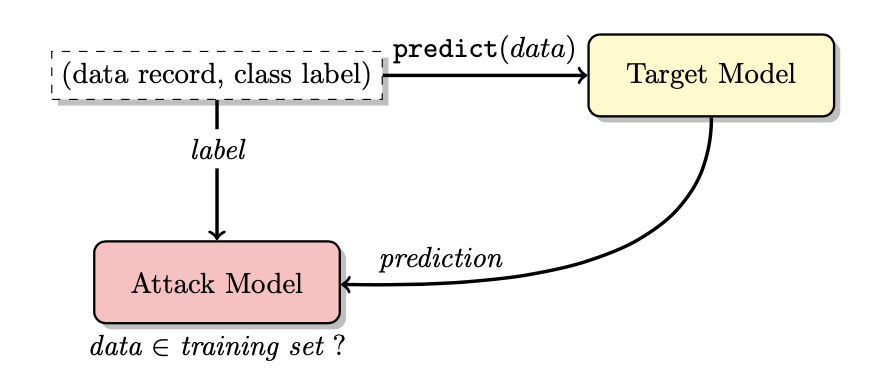

In [57]:
# Show image with relationship between attack model and target model
display.Image("https://github.com/benediktstroebl/hosted-files/raw/cec214a70eca84fd0e8a8c0761d6b1d9ad65e980/MembershipInferenceAttack_Black_Box.png", height=400)

**Figure 2**: Attack model and target model in the Membership Inference Attack

Image source: Shokri, R., Stronati, M., Song, C., & Shmatikov, V. (2017, May). Membership inference attacks against machine learning models. In 2017 IEEE symposium on security and privacy (SP) (pp. 3-18). IEEE. Available at: https://arxiv.org/abs/1610.05820

<a id="results-and-discussion1"></a>
## Results & Discussion

It's time to find out how well our attack worked!

We can use the evaluation function just implemented and draw a plot which shows the accuracy achieved per class.

In [58]:
# Evaluate performance of attack models on target model and its data
# Reminder: this data is unseen to the attack models
attack_eval = evaluate_attack_models(attack_models, target_model, train_images_target, train_labels_target, test_images_target, test_labels_target)

20/20 [==============================] - 0s 2ms/step - loss: 0.6199 - accuracy: 0.7296


Text(0.082, 0.91, 'Plot shows accuracy of attack on target model per class')

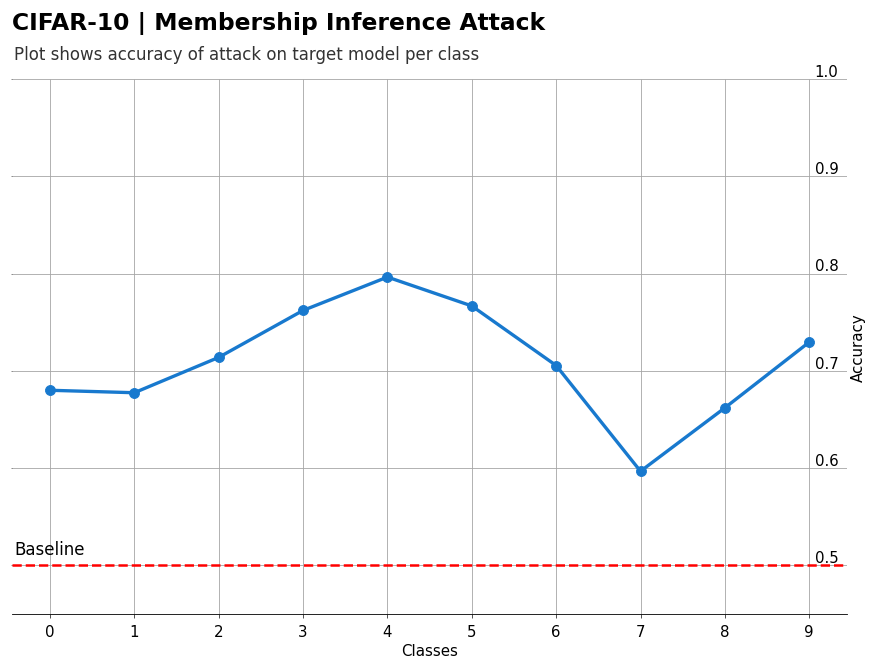

In [59]:
# Plot performance of our membership inference attack
fig, ax = plt.subplots()
ax.plot(attack_eval[:,1], marker='o', markersize=12)
ax.axhline(y=0.5, color='r', linestyle='--', linewidth=3)
ax.text(x=.082, y=.16, 
        s="Baseline", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20)
ax.set_title("CIFAR-10 | Membership Inference Attack")
ax.set_xlabel('Classes')
ax.set_ylabel('Accuracy')
ax.yaxis.set_label_position("right")
ax.set_ylim(bottom=0.45, top=1)
ax.set_xticks(np.arange(0, 10, step=1))
ax.text(x=.082, y=.91, 
        s="Plot shows accuracy of attack on target model per class", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20, 
        alpha=.8)

This looks pretty good! Or bad - depending on who you are. The attacker reached an accuracy of over 0.5 for every single class. This means that for every class in the dataset, **we can predict whether an image was part of the training set in a more sophisticated way than if we just guess** (which is the baseline accuracy of 0.5). 

For some classes, the accuracy even reaches 0.8, meaning that we know whether an image of that class was used in the training of the target model in 80% of cases.

**By exploiting the idea that similar models trained on relatively similar data behave in a similar way**, we have successfully attacked a machine learning model and forced it to leak information about its training data. The manifold privacy risks arising from the effectiveness of the Membership Inference Attack, whether health-care or census datasets are concerned, are substantial and ask for effective mitigation strategies.

<a id="mitigation1"></a>
## Epilogue: Mitigation Strategies

While this result is shocking, several mitigation strategies exist. **If anything, our tutorial shows that it is absolutley paramount to use them in ML tools deployed in real-world applications - and for policy-makers to demand such robustness-increasing methods to be implemented and improved.**

The easiest method to implement is to **limit the number of confidence scores the model returns on a given input**. In order to minimize the information about the model and its training data being leaked, a model could even return only the most likely class and not disclose any confidence score.

Another approach is to use **regularization**. This **tackles the problem of overfitting**, which leads to the target model giving away too much information about its training set when reporting classification confidence scores.

Let's quickly implement L2 Regularization to see if this actually makes a meaningful difference to the performance of our attack models. 
To do that, we create a new target model which uses L2 Regulatization.

In [60]:
# Lets retrain our target model with applying L2 Regularization on our weights
target_model_l2_reg = models.Sequential()
target_model_l2_reg.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.01)))
target_model_l2_reg.add(layers.MaxPooling2D((2, 2)))
target_model_l2_reg.add(layers.Conv2D(64, (3, 3), activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
target_model_l2_reg.add(layers.MaxPooling2D((2, 2)))
target_model_l2_reg.add(layers.Flatten())
target_model_l2_reg.add(layers.Dense(128, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
target_model_l2_reg.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

train_target_model(target_model_l2_reg, train_images_target, train_labels_target, test_images_target, test_labels_target)

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


94/94 [==============================] - 1s 8ms/step - loss: 3.8198 - accuracy: 0.2810 - val_loss: 2.7596 - val_accuracy: 0.3663
Epoch 2/30
94/94 [==============================] - 1s 6ms/step - loss: 2.4525 - accuracy: 0.3773 - val_loss: 2.2950 - val_accuracy: 0.3427
Epoch 3/30
94/94 [==============================] - 1s 5ms/step - loss: 2.1626 - accuracy: 0.3973 - val_loss: 2.1029 - val_accuracy: 0.4070
Epoch 4/30
94/94 [==============================] - 1s 6ms/step - loss: 2.0880 - accuracy: 0.4003 - val_loss: 2.0417 - val_accuracy: 0.4140
Epoch 5/30
94/94 [==============================] - 1s 6ms/step - loss: 2.0177 - accuracy: 0.4070 - val_loss: 2.0260 - val_accuracy: 0.4030
Epoch 6/30
94/94 [==============================] - 1s 6ms/step - loss: 2.0000 - accuracy: 0.4210 - val_loss: 2.0081 - val_accuracy: 0.4063
Epoch 7/30
94/94 [==============================] - 1s 6ms/step - loss: 1.9737 - accuracy: 0.4157 - val_loss: 1.9964 - val_accuracy: 0.4030
Epoch 8/30
94/94 [=============

(<keras.engine.sequential.Sequential at 0x7f97d58f96d0>,
 <keras.callbacks.History at 0x7f97d58c0460>)

We can use the same evaluation method as before to see how the attacker performs in this new scenario.

In [61]:
# Evaluate our attack model on the L2-regularized target model 
attack_eval_l2_reg = evaluate_attack_models(attack_models, target_model_l2_reg, train_images_target, train_labels_target, test_images_target, test_labels_target)

20/20 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5440


Let's again plot the results and compare them against the previous attack without any mitigation.

Text(0.082, 0.91, 'Plot shows accuracy of attack on the target model per class with L2-regularization applied')

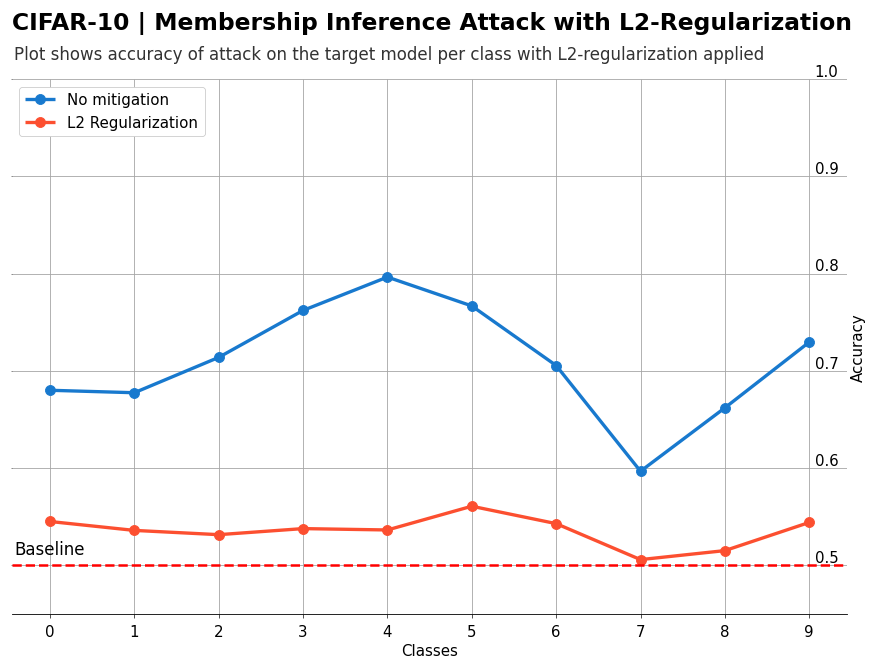

In [62]:
# Plot performance curve per class to compare mitigation performance
fig, ax = plt.subplots()
ax.plot(attack_eval[:,1], marker='o', markersize=12 , label="No mitigation")
ax.plot(attack_eval_l2_reg[:,1], marker='o', markersize=12, label="L2 Regularization")
ax.legend(loc='upper left')
ax.axhline(y=0.5, color='r', linestyle='--', linewidth=3)
ax.text(x=.082, y=.16, 
        s="Baseline", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20)
ax.set_title("CIFAR-10 | Membership Inference Attack with L2-Regularization")
ax.set_xlabel('Classes')
ax.set_ylabel('Accuracy')
ax.yaxis.set_label_position("right")
ax.set_ylim(bottom=0.45, top=1)
ax.set_xticks(np.arange(0, 10, step=1))
ax.text(x=.082, y=.91, 
        s="Plot shows accuracy of attack on the target model per class with L2-regularization applied", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20, 
        alpha=.8)

We clearly see that **L2 Regularization of the target model makes it more difficult for the attacker to predict the membership of data points in the training set of the target model**. For each class, the accuracy of the new attacker is below the accuracy of the attacker when no mitigation strategy is in place. This increased robustness is exactly what is needed to protect machine learning models against malicious actors. Further research is however needed into making ML models entirely secure against Membership Inference Attacks and thus protect the privacy of those individuals whose data was used in the training of models.

<a id="limitations1"></a>
## Limitations
As pointed out throughout this part of the tutorial, several simplifications were made that allowed us to implement this complex attack in a pedagogically valuable way.
* We took one dataset and split it up in two subsets, one for the target model and one for the attacker to train the shadow models. In reality, the attacker would however only have an assumption about the distribution of the training data of the target model. Nevertheless, our simplification does not influence the performance of the attack in any way: the researchers of the original paper (see Source) point out that **prior knowledge about the distribution of the target model's training data is not necessary for a successful attack.**
* The example we have demonstrated is an attack on a classification task with ten classes. In reality, the number of classes could be only two, or it could be several hundred. Importantly, **with an increasing number of classes, the accuracy of the attacker will increase**, as the target model is forced to leak more information about how it works and about the training data by revealing more confidence scores.
* A further limitation of this tutorial is the fixed training set size of the target model, which we had to have to limit the necessary resources to run this example. As we saw, the target model is **highly overfitted to its training data, which also means that it reveals a lot of information about the training data** when reporting the confidence scores of classification tasks. While overfitting is not the only issue that leads to a high vulnerability to Membership Inference Attacks, it definitely has an effect. Increasing the training set size of the target model, which would ceteris paribus mitigate overfitting, would lead to a lower attack accuracy.

<a id="attack2"></a>
# Attack 2: Evasion Attack or The Power of Adversarial Examples

In this second example, an Evasion attack is implemented. Evasion attacks **can be both  black-box**, as the previous example, **or white-box**, meaning with access to and knowledge of the model. An evasion attack focuses on **interfering** with the model **at the deployment stage** by manipulating input data **to produce an error, or most often, a misclassification** by the model. An evasion attack therefore does not manipulate or change the functioning of the model but exploits its imperfections.

Evasion attacks are the **most prevalent (and also most researched) attacks** and there are various *use-cases* or contexts in which misclassification is the goal of an attacker. A classical example is an attacker that wants to **avoid detection by a spam or malware filter**. Most examples of evasion attacks come from the computer vision field, but evasion attacks can also be performed on all other types of systems (text based, audio based, etc.). 

In this tutorial we use the following scenario: In the last weeks and months there were several stories of [*misbehaving* or irationally behaving Tesla cars](https://www.youtube.com/watch?v=6Kf3I_OyDlI), which turned into a considerable threat on the streets. To achieve the goal of self-driving cars an important capability is to detect and identify street signs and adapt the driving accordingly. A malicious actor, trying to compromise the trust in these cars, might want to achieve a misclassification of such a street sign, for example, misclassifying a STOP sign. Such an attack could either be a targeted or a non-targeted:

*   In a **non-targeted** attack, the malicious actor just wants to achieve that the STOP sign is not recognized as such. He does not care about into which other class the algorithm classifies the image.

*   In a **targeted** attack, the malicious actor wants the model to classify the STOP sign as a specific other street sign, e.g. a PRIORITY Sign to trigger the most dangerous behaviour of the car.

In our example you will see how easily such a system could be tricked by creating adverserial examples of pictures of STOP signs, with small peruturbations, invisible for the human eye. In the following we will use the Fast Gradient Sign Method (FGSM) to create adversarial examples, which can be classified as a white-box attack, as it exploits knowledge about the gradient of the target model.

<a id="software2"></a>
## Software Requirements

We will list all the requirements for this attack here, separately from those needed for the first attack so that you can use it as a stand alone example, if you want to.

In order to run this second part of the tutorial, you again need to install some dependencies.

Running this in **Google Colab**  will not require you to install any dependencies since all the required libraries are already installed on Colab runtimes.

However, if you want to run this locally, we recommend to install the latest Python version (3.10). Moreover, the following libraries are required:
*   tensorflow
*   scikit-learn
*   matplotlib
*   numpy
*   PIL

You can install these by running the following cell on your local machine. 

**Note:** You may need to replace *%* with an *!* depending on your operating system or runtime setup.

In [1]:
%pip install tensorflow numpy matplotlib scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Data visualization
import matplotlib.pyplot as plt 

# Data manipulation
import numpy as np
import tensorflow as tf
import os

# Data modelling
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers

import random as rd
from sklearn.model_selection import GroupShuffleSplit

# Load custom stylesheet for plots
plt.style.use('https://raw.githubusercontent.com/benediktstroebl/hosted-files/main/custom_style.mplstyle')

# Set seed
rd.seed(42)

<a id="data-description2"></a>
## Data Description

We will use the Training Data of the German Traffic Sign Recognition Benchmark (GTSRB) data set. It consists of 26640 images of 43 different types of traffic signs an individual image comes in a 32x32x3 format. Each class of traffic signs is contained in a subfolder within the training data. 

As you can see in the data loading script, we use this structure to get the labels for the images. You will notice that the traffic signs are not unique but there are multiple images taken of only 1306 signs. We use the image-naming to construct a sign-id. The sign-id is used to group images from the same traffic sign to either all be in the training or all be in the validation set. Otherwise our classifier would be evaluated on previously seen samples. This is known as data-leakage.

<a id="data-download2"></a>
## Data Download

To follow the tutorial you will download the dataset ["GTSRB_Final_Training_Images.zip"](https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB-Training_fixed.zip) and unpack it. 

If you are working locally, you can also download and unzip locally and change the file path. 

Data Citation: 

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.

**But let's read in the data:**

In [6]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB-Training_fixed.zip \
      -P /tmp/

!unzip /tmp/GTSRB-Training_fixed.zip -d /tmp/GTSRB-Training_fixed

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: /tmp/GTSRB-Training_fixed/GTSRB/Training/00030/00007_00024.ppm  
  inflating: /tmp/GTSRB-Training_fixed/GTSRB/Training/00030/00007_00025.ppm  
  inflating: /tmp/GTSRB-Training_fixed/GTSRB/Training/00030/00007_00026.ppm  
  inflating: /tmp/GTSRB-Training_fixed/GTSRB/Training/00030/00007_00027.ppm  
  inflating: /tmp/GTSRB-Training_fixed/GTSRB/Training/00030/00007_00028.ppm  
  inflating: /tmp/GTSRB-Training_fixed/GTSRB/Training/00030/00007_00029.ppm  
  inflating: /tmp/GTSRB-Training_fixed/GTSRB/Training/00030/00008_00000.ppm  
  inflating: /tmp/GTSRB-Training_fixed/GTSRB/Training/00030/00008_00001.ppm  
  inflating: /tmp/GTSRB-Training_fixed/GTSRB/Training/00030/00008_00002.ppm  
  inflating: /tmp/GTSRB-Training_fixed/GTSRB/Training/00030/00008_00003.ppm  
  inflating: /tmp/GTSRB-Training_fixed/GTSRB/Training/00030/00008_00004.ppm  
  inflating: /tmp/GTSRB-Training_fixed/GTSRB/Training/00030/00008_00005.ppm

In [7]:
images_path = "/tmp/GTSRB-Training_fixed/GTSRB/Training/" # insert the path to the training directory here

images = images_path + "00000" ## add the class string

data = [] 
sign = []
labels = []
classes = 43

#we need to set up a way to distinguish the individual traffic signs
sign_id = -1
same_sign = "start"
for i in range(classes):
    img_path = images[:-len(str(i))] + str(i)
    for img in sorted(os.listdir(img_path)):
        
        #filter out the GT csv files 
        if "GT" in img:
            continue
        
        # check if the same traffic sign
        if same_sign != img[:5]:
            sign_id += 1
            same_sign = img[:5]

        im = Image.open(img_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data.append(im)
        labels.append(i)
        sign.append(sign_id)


data = np.array(data) 
labels = np.array(labels)
sign = np.array(sign)


<a class="anchor" id="data-preprocessing2"></a>
## Data Preprocessing

Before we do anything, we split our data into a 90/10 training and evaluation split using the GroupShuffleSplit() function which returns indeces for training and validation/test data based on specific groups. 

In [9]:
# We need to avoid having the same traffic sign in train and val set
gs = GroupShuffleSplit(n_splits=2, test_size=.1, random_state=0)
train_ix, val_ix = next(gs.split(data, labels, groups=sign))

x_train_raw = data[train_ix]
y_train_raw = labels[train_ix]

x_val_raw = data[val_ix]
y_val_raw = labels[val_ix]

**Let's have a first look at our data**

Below is a small visualising function that you can use to display images and their classes.

In [10]:
def visualize(dataset, index, class_label, class_pred = 0, class_confidence = False): 
  """
  This function creates the visualizations of the traffic signs we will use repeatedly below.
  """
  plt.figure(figsize=(10,6))
  plt.imshow(dataset[index])
  if not class_confidence:
      plt.title('Class: {}'.format(class_label))
  else:
      plt.title('True Class: {} \nPredicted: {} with \n{:.2f}% Confidence'.format(class_label, class_pred, class_confidence*100))
  plt.show()


Let's take a look at 5 sample images from our dataset.

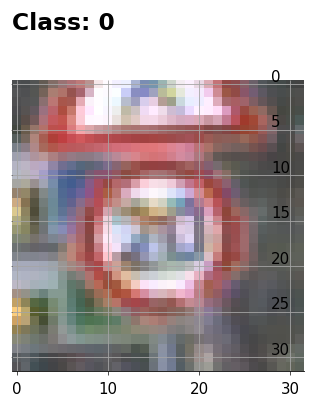

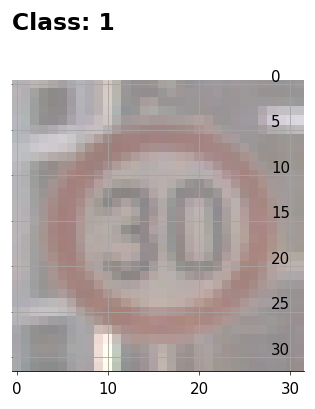

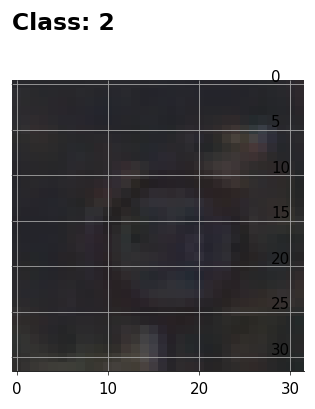

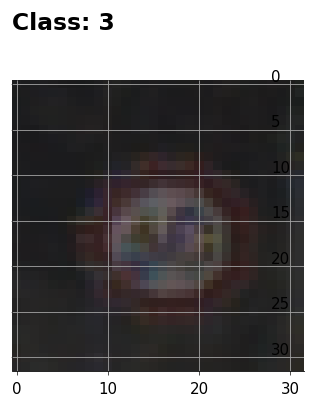

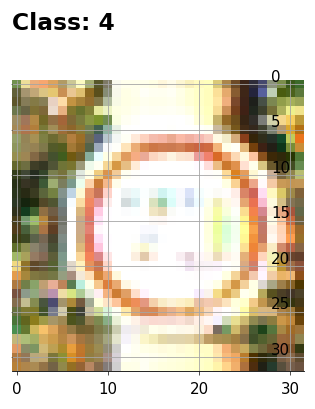

In [11]:
for i in range(5):
    visualize(x_train_raw, np.where(y_train_raw == i)[0][0], i)

### Converting the data into the right format

When reading in our data, the images came in 0-255 RGB format and each class as an individual integer. 

However, for our tutorial we want the RGB values to be between [-1,1] and the ground truths to be vectors containing 42 zeros and a single one at the index of the class. As we are working with a classifier the final output is not a single number but a probability for each class. 

In [13]:
# We first define a simple function to center our data around 0: 
def center_255(x):
    x = tf.cast(x, tf.float32)  # we also need to cast the data into the right format
    x /= 127.5                  # We divide by 255/2
    x -= 1.0                    # Then push between -1 and 1
    return x


In [14]:
# Let's convert
x_train = center_255(x_train_raw)
y_train = keras.utils.to_categorical(y_train_raw, 43)

x_val = center_255(x_val_raw)
y_val = keras.utils.to_categorical(y_val_raw, 43)

<a id="introducton2"></a>
## Introduction to Evasion Attacks

Before we deep-dive into the practical nitty gritty details of how to create adversarial examples for non-targeted and targeted evasion attacks, we need to take a step back and understand how generally these attacks work on a conceptual level.


**The Use of the loss function**

The backbone of any neural network is - next to its architecture - its loss function $l$. 
When training a neural network classificatier we typically minimize $l$ with respect to our parameters $\theta$.
In our example (as with most deep classifiers) we use the cross entropy loss: 

$l(h_{\theta}(x), y) = log(\sum^k_j exp(h_{\theta}(x)_j)) - h_{\theta}(x)_y$. 

, where $h_{\theta}(x)_j$ is the $j^{th}$ element of the model prediction vector and $h_{\theta}(x)_y$ is the ground truth. 

This loss is then optimized by minimizing over the average loss over our samples with respect to *parameters $\theta$*:

$minimize_{\theta} \frac{1}{n} \sum_i^n l(h(x_i), y_i)$


**Turning into a malicious actor**

However, when creating an adverse example, we change our objective a litte. We **(a) optimize the loss with respect to the input and (b) we want to maximize the loss**.

**Non-targeted attack**

If we *only* perform a non-targeted attack we can reformulate the loss function we are trying to optimize in a general way:

$maximize_{\tilde{x}} l(h(\tilde{x}), y_i)$

However, we do not want to just change the input to $\tilde{x}$ and have a completely different image. That would defeat the point of an adversarial attack to perturb without being detected immediately. Instead we want to add a *perturbation* $\delta$ to the image. This is most often noise but could also be a subtle rotation, blurr, or change in background - anything that the human eye may not perceive as a distinct difference but will throw off a model. We can place restrictions onto the set of perturbations $∆$ by letting the perturbation be smaller or equal to a value we can parameterize $\epsilon$:

$∆ = \{\delta : ||\delta||_{\infty} ≤ \epsilon\}$

Our final optimization function maximizes the loss between prediction and ground truth with respect to the perturbation added to the input image:

$maximize_{\delta \in ∆} l(h(x_i + \delta), y_i)$

To generate our final perturbed adversarial we add the opposite of the gradient of the loss with respect to the input multiplied with our perturbation: 

$\tilde{x} = x + \epsilon * sign(\nabla_x l(h_(x), y))$

**Targeted Attack**

We can also extend the notion of the evasion attack from simply trying to misclassify an input to something that it is not to misclassify it to a specific class. 
If we were particularly malicious we could misclassify a STOP sign to be a PRIORITY sign.
To does so we add another term to our optimization task by rewarding the model when predicting our target class: 

$maximize_{\delta \in ∆}(l(h(x_i + \delta), y_i) - l(h(x_i + \delta), y_{target}))$

The function is constructed so that decreasing the difference between the prediction and the target class helps maximizing the function. It is an example of how powerful the choice of optimization is in determining model behavior. 

Adapted from Kolter and Madry (2019)

**Source**: Kolter, Z., &amp; Madry, A. (2019). Chapter 1 - introduction to adversarial robustness. Adversarial Robustness - Theory and Practice. Retrieved December 10, 2022, from https://adversarial-ml-tutorial.org/introduction/ 

<a id="the-attack2"></a>
## The Attack

Now that we have the data sorted out and a theoretical understanding of our planned attacks, lets dive into the machine learning part. 

In this section we will: 
* build a simple yet effective classifier
* calculate a specific perturbation
* test different strengths of the perturbation and its capacity to fool the model


<a id="targetmodel2"></a>
### Define our Target Model

First we define a rather simple machine learning model. We adapt a simple model from the [Keras website](https://keras.io/examples/vision/mnist_convnet/).

The model we are using is a basic Convolutional Neural Network (CNN) with one convolutional layer and a max pooling layer, a fully connected layer of size 43, for all the classes, with a SoftMax activation. The activation function used on the convolutional layers is ReLu.

*(Note: if you want to play around with the "power" of the network and the needed level of perturbations to trick the model, you can for example de-comment the second convolutional layer and then see, what you need to adapt later on to still be able to fool the model)*

In [15]:
input_shape = (32, 32, 3)

## Keras Model adapted from the Keras website:
# https://keras.io/examples/vision/mnist_convnet/
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        #layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(43, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dropout (Dropout)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 43)                309643    
                                                                 
Total params: 310,539
Trainable params: 310,539
Non-trainable params: 0
__________________________________________________

### Train our Target Model

We now train our model for 10 epochs with a batch size of 128. As loss function we choose the Categorical Crossentropy Loss, a very typical loss function for classification tasks.

In [16]:
batch_size = 128
epochs = 10

# Notice the cross-entropy loss
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
188/188 [==============================] - 10s 4ms/step - loss: 1.5957 - accuracy: 0.5909 - val_loss: 0.9354 - val_accuracy: 0.7356
Epoch 2/10
188/188 [==============================] - 1s 3ms/step - loss: 0.5124 - accuracy: 0.8776 - val_loss: 0.7200 - val_accuracy: 0.8030
Epoch 3/10
188/188 [==============================] - 1s 3ms/step - loss: 0.3148 - accuracy: 0.9279 - val_loss: 0.6413 - val_accuracy: 0.8311
Epoch 4/10
188/188 [==============================] - 1s 3ms/step - loss: 0.2276 - accuracy: 0.9471 - val_loss: 0.5910 - val_accuracy: 0.8494
Epoch 5/10
188/188 [==============================] - 1s 3ms/step - loss: 0.1779 - accuracy: 0.9592 - val_loss: 0.6266 - val_accuracy: 0.8453
Epoch 6/10
188/188 [==============================] - 1s 3ms/step - loss: 0.1538 - accuracy: 0.9626 - val_loss: 0.6101 - val_accuracy: 0.8573
Epoch 7/10
188/188 [==============================] - 1s 3ms/step - loss: 0.1327 - accuracy: 0.9675 - val_loss: 0.6320 - val_accuracy: 0.8592
Epoch

Let's visualize the learning curve of our model:

Text(0.082, 0.91, 'Plot shows learning curve of target model training')

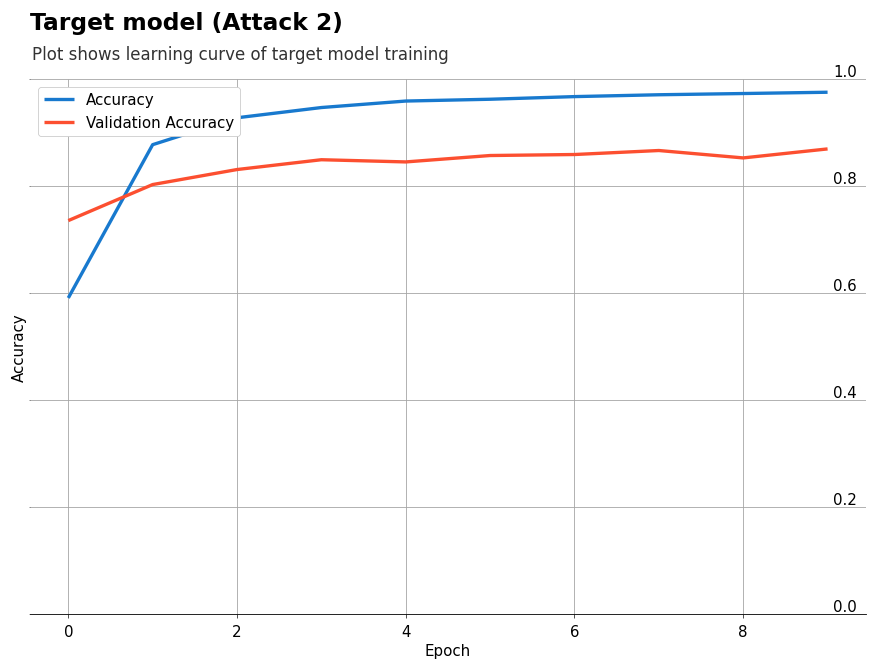

In [17]:
# Plot learning curve
fig, ax = plt.subplots()
ax.plot(model_hist.history['accuracy'], label='Accuracy')
ax.plot(model_hist.history['val_accuracy'], label = 'Validation Accuracy')
ax.set_title('Target model (Attack 2)')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_ylim([0, 1])
ax.legend(loc='upper left')
ax.text(x=.082, y=.91, 
        s="Plot shows learning curve of target model training", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20, 
        alpha=.8)


We can already see that our model is doing quite well given its simplicity. Let's see how it does on a couple of randomly picked validation street signs.

In [18]:
# Let's predict both the training and validation outputs... 
train_pred = model.predict(x_train)
val_pred = model.predict(x_val)

84/84 [==============================] - 0s 2ms/step


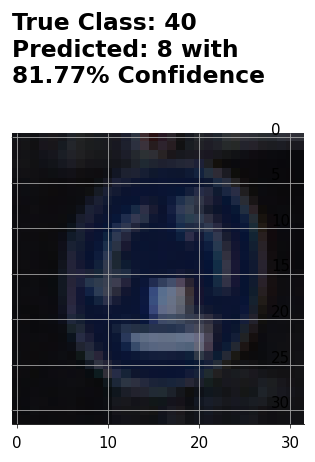

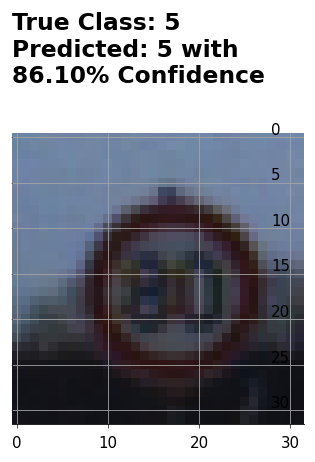

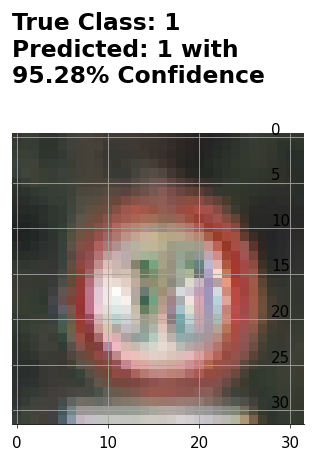

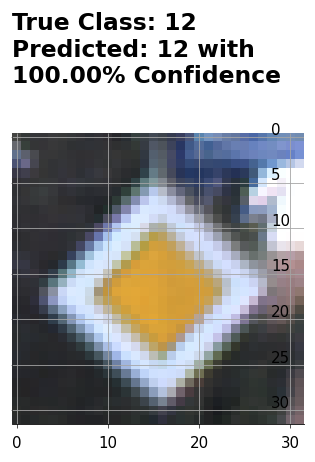

In [19]:
# ... and use ur visualize function from before
for i in range(4):
    pic_ix = rd.randint(0, len(x_val))
    visualize(x_val_raw, pic_ix , y_val_raw[pic_ix], np.argmax(val_pred[pic_ix]), np.max(val_pred[pic_ix]))


Wow! Given the simplicity of the model and the quality of the images, our classifier is doing a good job!

So let's see if we can change that with a simple attack...

<a id="nontargetedattack"></a>
### A Non-Targeted Attack
As we described in our introduction, let's try to fool the model so it does not recognize a STOP sign anymore.
Therefore, we need to get one sample image of a STOP sign from our dataset. STOP signs are denoted with Class 14.

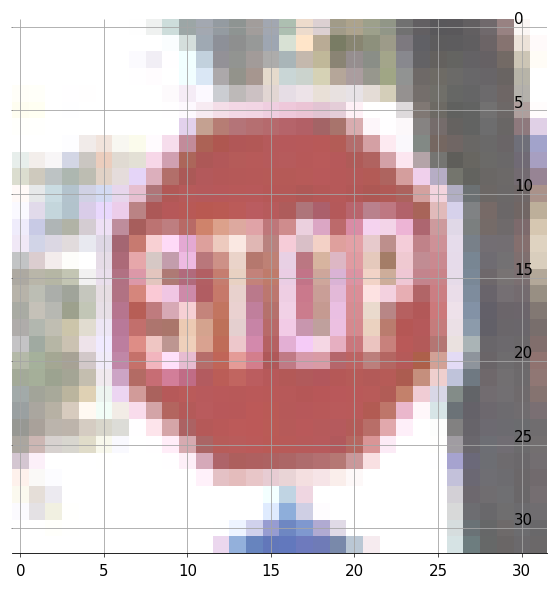

In [20]:
# Plot stop image
stop_image_raw = x_train_raw[np.where(y_train_raw == 14)[0][0]]
plt.imshow(stop_image_raw)

Again, we do the normal preprocessing to use it in our model and create a respective label vector...

In [21]:
stop_image = center_255(stop_image_raw)
stop_image = stop_image[None, ...]         # We add an empty dimension so we can use model.predict

In [22]:
# create one-hot encoded label for our stop sign sample
stop_label = 14
stop_y = keras.utils.to_categorical(stop_label, 43)

#### Creating the Perturbation Pattern

We now need to define a function that creates the perturbation pattern using the gradient of our model.
Using the GradientTape() method we can *watch* the variable given to it and request the gradient of any result computed with it.
We therefore give the function our sample image, calculate it's prediction with our model and the assoicated loss (define the loss function in advance). In the next step, we then use the .gradient() function to calculate the gradients of the loss function with respect to the input image.

As discussed, we create the perturbations by moving in the direction of maximizing the loss (instead of minimizing it). We therefore need the signs of the calculated gradients, which we get with the .sign() function.

(Adapted from: Tensorflow Tutorial "Adverserial example using FGSM": https://www.tensorflow.org/tutorials/generative/adversarial_fgsm)

In [23]:
loss_class = tf.keras.losses.CategoricalCrossentropy()

In [24]:
def create_non_target_perturbation_pattern(inp_x, inp_y):
  """
  This functions creates the perturbation patterns for the non-targeted evasion attack.
  """
  with tf.GradientTape() as tape:
    tape.watch(inp_x)
    prediction = model(inp_x)
    loss = loss_class(inp_y.reshape(1,43), prediction)
  
  gradient = tape.gradient(loss, inp_x)
  signed_grad = tf.sign(gradient)
  return signed_grad

In [25]:
perturbations = create_non_target_perturbation_pattern(stop_image, stop_y)

We can also visualize the calculated perturbation pattern...

Text(0.0, 1.0, 'Perturbation Pattern')

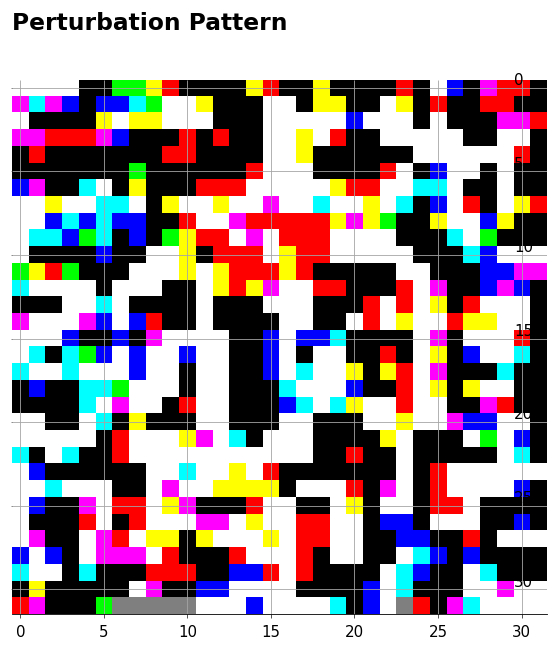

In [26]:
plt.imshow(perturbations[0]*0.5 + 0.5) # We rescale the perturbation pattern to [0,1] for visualization
plt.title('Perturbation Pattern \nNon-Targeted Attack')

#### Applying the perturbations to our original image

As we have discussed in the introduction, we can introduce a parameter $\epsilon$ to place restrictions onto the set of perturbations, when we apply it to our original image. Why would we want to do that?

As an attacker, you ideally do not want that a human eye can detect your perturbations. You therefore might want to try out different *levels* of perturbations added to your picture. In the following we therefore play around with different values of $\epsilon$ between 0,01 and 0,2 and see (1) how the image visually changes and (2) how the predictive power of our model changes. Let's see if we are able to fool it!

1/1 [==============================] - 0s 16ms/step


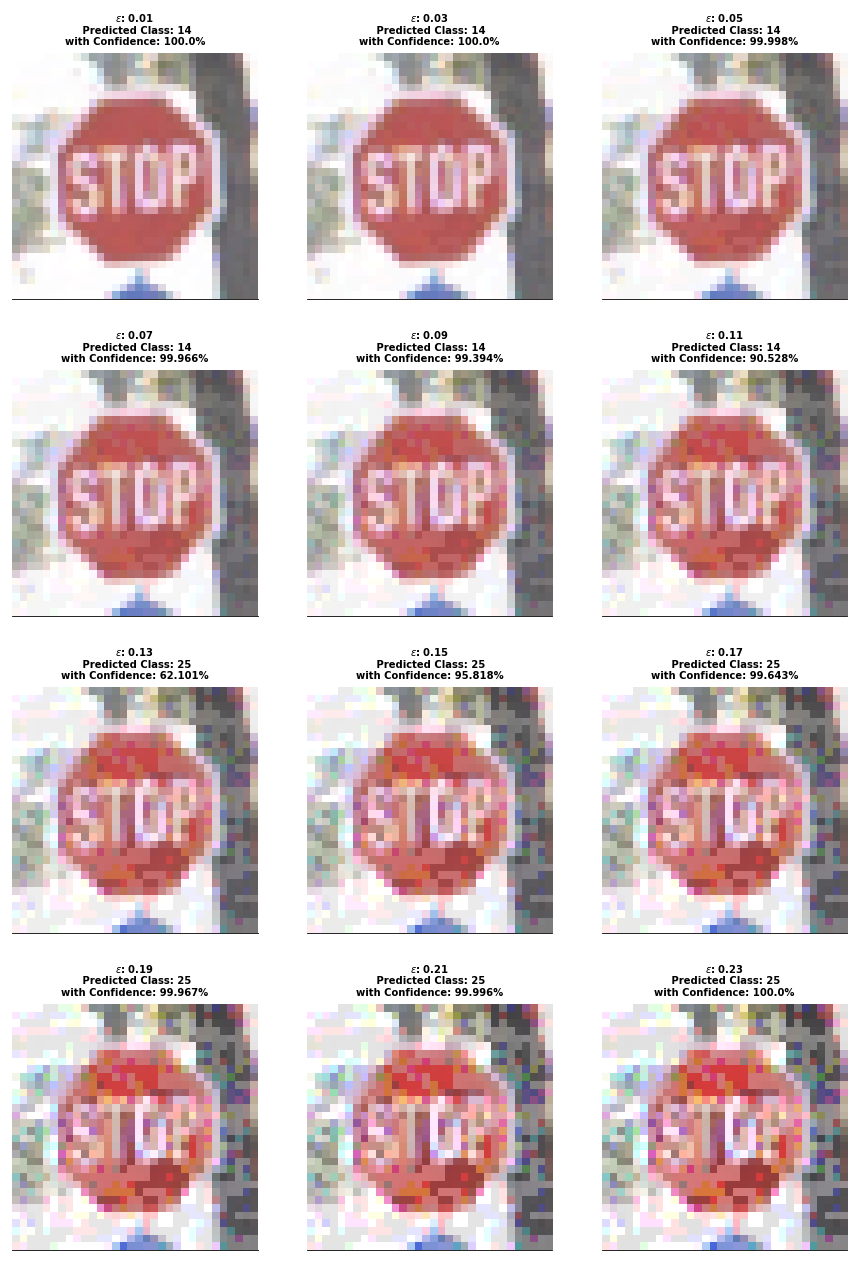

In [27]:
# Set up some arrays for metrics
rec_pred_val = [] 
rec_pred_class = []
epsilon_range = [i/100 for i in range(1,25,2)]  # try different ranges of epislon to see stronger perturbation

plt.figure(figsize= (16,25))
for i, eps in enumerate(epsilon_range):         # iterate over a number of different epsilons (the strength)

    adv_x = stop_image + (eps)*perturbations    # perturb the image
    adv_x = tf.clip_by_value(adv_x, -1, 1)      # make sure we are in the [-1,1] range

    # predict and calculate the output class
    pred_adv = model.predict(adv_x)
    class_pred = np.argmax(pred_adv)

    #record the predictions
    rec_pred_class.append(class_pred)
    rec_pred_val.append(pred_adv[0][class_pred])    
    
    # plot
    plt.subplot(4,3,i+1)                        
    plt.imshow(adv_x[0]*0.5 + 0.5)
    plt.title(f"$\epsilon$: {eps}\n Predicted Class: {class_pred}\nwith Confidence: {round(pred_adv[0][class_pred]*100,3)}%", 
        fontsize=12,loc='center', pad=10)
    plt.xticks([])
    plt.yticks([])


**GREAT! We fooled our model!**

Given the last 6 perturbed images, the model quite confindently predicts the STOP sign as belonging to Class 25, which is the class of "Construction Side"-Signs *(the wrongly predicted class can change depending on whether you used the seed we set at the beginning)*. Even though we have to quite strongly apply our perturbation pattern, the human eye still confidently would identify the sign as a STOP sign. One might think that the sign just got a bit dirty, or sprayed with grafitti.

We can add a plot to nicely visualize the confidence of our model during these predictions and notice how our model at first is very confident in it's predictions. Then the confidence dips rapidly as it misclassifies the first time. Afterwards the model becomes more and more confident in its wrong classification.

Text(0.0, 1.0, 'Confidence of the model predicting the perturbed image with increasing epsilon')

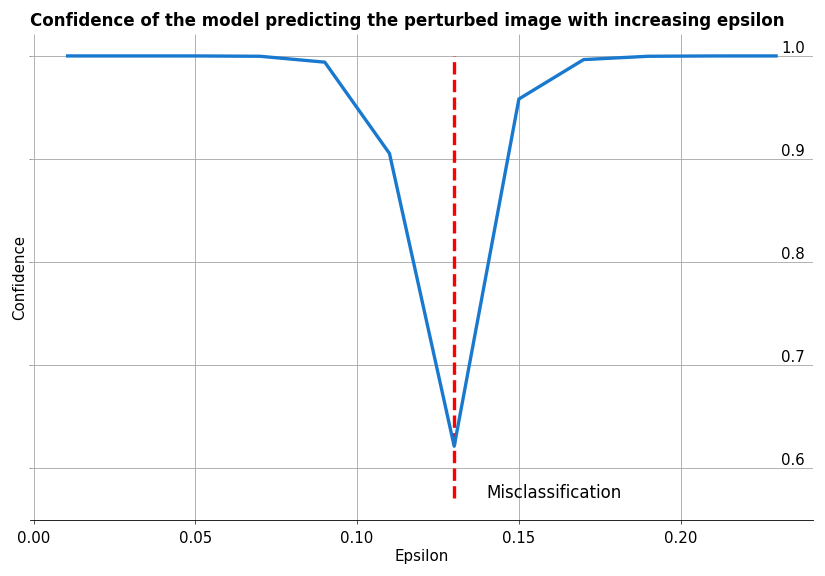

In [28]:
plt.figure(figsize=(15,10))
plt.plot(epsilon_range, rec_pred_val)
plt.vlines(epsilon_range[np.argmin(rec_pred_val)], np.min(rec_pred_val)-.05, 1, linestyles="--", color="red")
plt.text(epsilon_range[np.argmin(rec_pred_val)]+0.01, np.min(rec_pred_val)-.05, "Misclassification", size = 20)
plt.xlabel("Epsilon")
plt.ylabel("Confidence")
plt.title("Confidence of the model predicting the perturbed image with increasing epsilon", fontsize=20, pad=10)

#### Interim conclusion

Even though our model was predicting the street sign images with quite high accuracy into the correct class, we were able to fool the model with perturbed images that were not identifiable as such with the human eye. If a malicious actor has full access to a model and the training data, it would be therefore quite easy to feed the model with adversarial examples and thereby provoke misclassifications.

But one might argue, that having a STOP sign misclassified as a Construction-Side-sign, is not that bad. For example a Speed 50 Limit sign could also be mis-classified as Limit 30 sign with a non-targeted attack and that would not really be an issue at all. 

So a malicious actor would maybe want to get an image misclassified into a specific class. This, as we already know, is known as **targeted attack**.

<a id="targetedattack"></a>
### A Targeted Attack

As we learned, the Fast Gradient Sign Method mainly uses the loss function and its gradients, to create the perturbation pattern. Let's have a look again at our function for the non-targeted attack. Calculating the loss, we only take the loss with respect to our target class into account, and try to maximize this.

In [30]:
## NOTE: This is the same function as above. It is here for you to review.
def create_non_target_perturbation_pattern(inp_x, inp_y):
  with tf.GradientTape() as tape:
    tape.watch(inp_x)
    prediction = model(inp_x)
    loss = loss_class(inp_y.reshape(1,43), prediction)
  
  gradient = tape.gradient(loss, inp_x)
  signed_grad = tf.sign(gradient)
  return signed_grad

If we now want to push the classifier in the direction of a specific class, we need to include this class into our considerations while calculating the loss. We only have to add a little thing:

(1) while we still try to maximize the loss for the correct class,

(2) we now at the same time try to minimize the loss for the class we want the classifier to put our example in.

The adjustment to the function to create the perturbation pattern is the following: We set up a target class vector (similar to the one hot encoded label vector of the input image) and enable the user to decide on the target class, that he passes as a parameter to the function. We then adjust the loss function to reward the model for predicting the target class, so the loss with respect to the target class gets minimized.


In [31]:
loss_class = tf.keras.losses.CategoricalCrossentropy()

In [32]:
# add the target_class parameter
def create_target_perturbation_pattern(inp_x, inp_y, target_class):
  """
  This function creates the perturbation pattern used for the targeted evasion attack.
  """
  with tf.GradientTape() as tape:
    tape.watch(inp_x)
    prediction = model(inp_x)

    #set up a target class vector
    target = np.zeros([1,43])
    target[0][target_class] = 1.0

    # reward the model for predicting the target class
    loss = loss_class(inp_y.reshape(1,43), prediction) - loss_class(target, prediction)

  gradient = tape.gradient(loss, inp_x)
  signed_grad = tf.sign(gradient)
  return signed_grad

So a malicious actor might want the model to predict the STOP sign as a sign with opposite meaning. Which would be the PRIORITY sign. Since we know that the PRIORITY signs belong to Class 12, we can pass this into the function to create a targeted perturbation pattern.

Text(0.0, 1.0, 'Perturbation Pattern \nTargeted Attack')

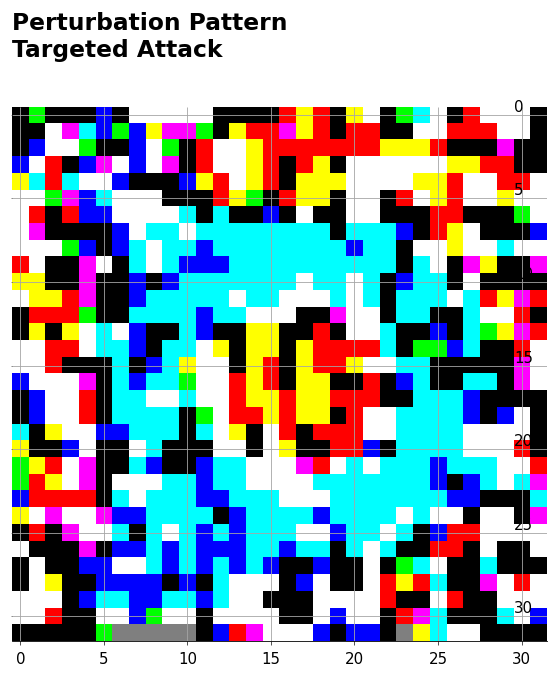

In [33]:
perturbations_targeted = create_target_perturbation_pattern(stop_image, stop_y, 12)
plt.imshow(perturbations_targeted[0]*0.5 + 0.5)
plt.title('Perturbation Pattern \nTargeted Attack')

Let's again visualize the application of the perturbation pattern to the original image and see what it takes to mis-classify the STOP sign into a PRIORITY sign - which really looks completely different in real life!

1/1 [==============================] - 0s 16ms/step


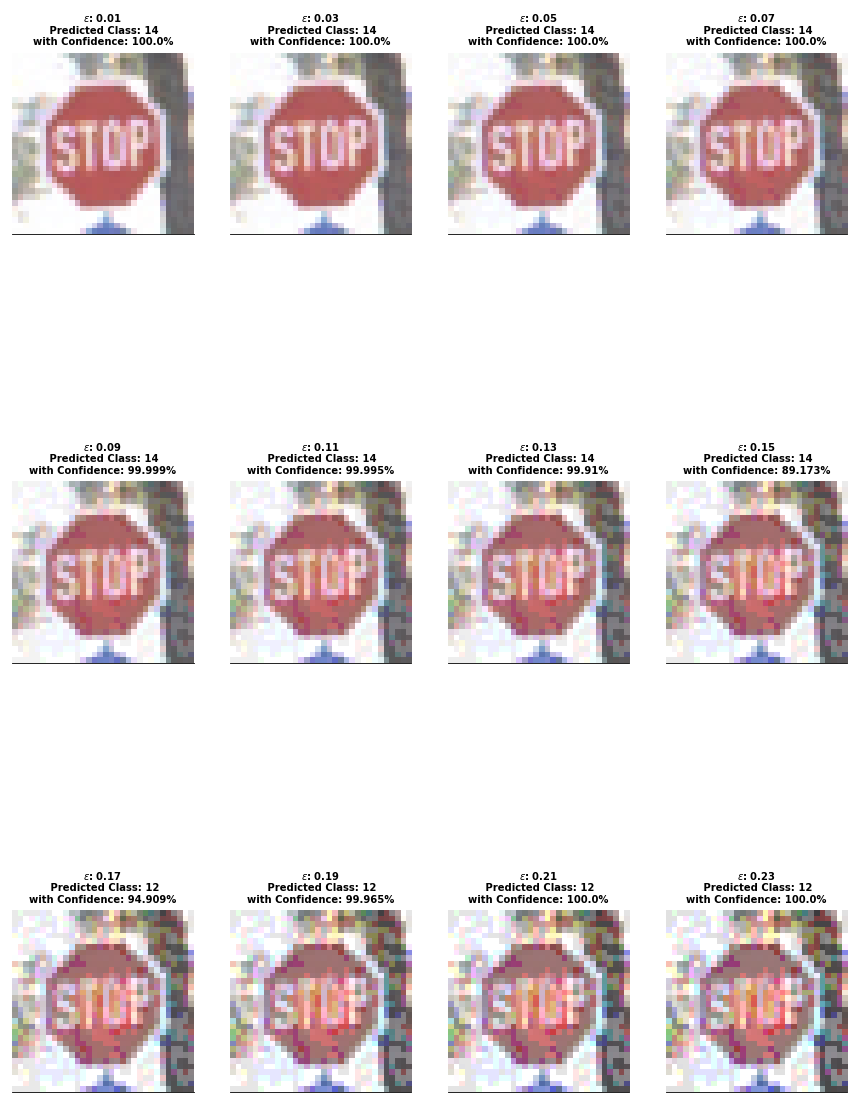

In [34]:
rec_pred_val = []
rec_pred_class = []
epsilon_range = [i/100 for i in range(1,25,2)]  # try different ranges of epislon to see stronger perturbation

plt.figure(figsize= (16,25))
for i, eps in enumerate(epsilon_range):

    adv_x = stop_image + (eps)*perturbations_targeted
    adv_x = tf.clip_by_value(adv_x, -1, 1)

    plt.subplot(3,4,i+1)
    plt.imshow(adv_x[0]*0.5 + 0.5)
    pred_adv = model.predict(adv_x)
    class_pred = np.argmax(pred_adv)
    rec_pred_class.append(class_pred)
    rec_pred_val.append(pred_adv[0][class_pred])
    plt.title(f"$\epsilon$: {eps}\n Predicted Class: {class_pred}\nwith Confidence: {round(pred_adv[0][class_pred]*100,3)}%", 
        fontsize=12,loc='center', pad=10)
    plt.xticks([])
    plt.yticks([])

<a id="results-and-discussion2"></a>
## Results & Discussion

The plots show, that **it is possible to distort the image in a way, that the model classifies it as a PRIORITY sign.** But the perturbations needed are a lot stronger. The prediction of the classifier changes with an epsilon of 0.17, for which the image just looks a bit more blury, but the sign still has the characteristics of a STOP sign (color, shape, letters). This example demonstrates quite nicely, how powerful these evasion attacks are.

### So, what to do about them?

There are a variety of mitigation strategies. Generally, your model should be as robust as possible which you can achieve by training a more complex model (try adding those extra layers and see how the mitigation threshold changes). Another mitigation strategy in that line, and also the most common one, is to train your model including some adversarial examples you have generated, but labelled with the correct label. You thereby teach the model to *ignore* the noise included in the pictures.

For an overview of more complex defense strategies check out the summary paper by Chakraborty et. al (2020). Also, this [library](https://github.com/cleverhans-lab/cleverhans/tree/master/defenses) includes implementations for defenses for the most common deep learning frameworks.

<a id="limitations2"></a>
## Limitations

While we are able to now trick a simple model classifying traffick signs there are a couple of differences to a real world.

* We implemented a white box attack, meaning we had perfect knowledge of every part of the model. This is unlikely to be the case as companies are protective about their model (you have just seen one of the reason why) and the data they are training on.
* Applying the perturbation to a real life sign is somewhat unrealistic unless you buy a lot of different [reflective stickers](https://www.salierdruck.de/reflektierende-aufkleber) (not to give you any bad ideas...).
* Our images are also static. A autonomous vehicle would be taking many different images (at different angles) and (hopefully) cameras with a better resolution than 32x32. This means that a static attack is unrealistic. You could, however, extend these attacks to time-series data such as videos. 
* We are using relatively few images and a very simple model. In the real world you would be training a much more powerful and robust classifer with more diverse data, which would be less prone to wrong predictions. As you will see when training a 2-layer CV, the perturbation has to be stronger when making the model better. 

<a id="next-steps"></a>
# Next Steps

In case you feel as excited as we do about what Adversarial Machine Learning can do and which implications it has for engineers, users, industry, and policy makers, then we strongly recommend you to go through the following paragraphs and follow our pointers towards additional resources and interesting questions to think about.

## Going Beyond What We Discussed

This tutorial provided you with a thorough but basic overview of what Adversarial Machine Learning means, what it comprises, and how two of the most central types of attacks could be implemented in practice. Now we encourage you to engage with the resources we provided for guided self study and the accompanying presentation to this tutorial that takes a more conceptual angel to introducing the topic.

To deepen your knowledge of adversarial robustness even further, we suggest **working your way through the different papers provided by Chakraborty et. al (2020)** as they list both attacks and defenses. You could also try to implement one of the defense techniques for the evasion attack and see if you can build a model that is stronger than the attacker.

In particular, **we suggest to familiarize yourself with the third overarching type of attack** that we did not cover in this notebook, namely ***Poisoning attacks***. While Exploratory and Evasion attacks, as exercise above, target the readily trained model in its testing and production phase, **Poisoning attacks aim at manipulating a model's decision function during the training process** itself by usually injecting *bad* data into the training set. Just like attacks on the model after the training has been completed, Poisoning attacks can have far-reaching implications on the performance and biases resulting from the model under attack. On important difference, however, is that **attacks during the training phase are often harder to detect** since once the data has been injected the attacker does not take action on the learning process anymore. Afterwards, try a defense on your attack and beating that defense again with a another attack...

## Further Policy Implications

You will notice that you have gotten yourself into the arms race that reflects the reality of the space. It is hence important for policy makers not only to acknowledge the real threat adversarial attacks pose but also that legislation has to be designed to obligate developers to continuously improve and strengthen their models' adversarial robustness and/or be adaptive to the changing landscape of attacks.

Any algorithm deployed by the public sector and general critical infrastructure (recall the child abuse classifier) needs to be tested against adversarial attacks and monitored in its effectiveness while deployed. 

**Food for Thought: Adversarial Machine Learning for Good?**

So far in this tutorial and, infact, the overwhelming majority of academic literature in the field of AML has focused on the risks of adversarial actors that exploit the the methods of AML to attack existing machine learning systems and thereby manipulate their outcome.

However, a small, newly emerging stream of work has raised the questions how we can formulate new questions related to the field of AML that lets us create use-cases where these attacks can be desirable for a society subject to ML.

Albert et al. (2022) argue that attacks such as perturbation, model inversion, or membership inference can be used for socially desirable ends and that the ML community's values impede socially beneficial uses of attacks. They provide us with a series of questions that we want to encourage you think about in light of an ever-accelerating landscape of increasingly powerful models entering our lives:

*   Why despite this significant body of work is it so rare that mainstream adversarial ML
researchers see the ML model itself as an adversary? 
*   Why is it that research on these non-trivial applications of adversarial ML comes almost exclusively from outside of the
core adversarial ML community?

Overall, this tutorial is a starting point for you to become aware of a key weakness that can have detrimental effects when deploying your model. We hope it helped school your awareness to think critically about the robustness of your model and how an adverse attacker could use the information you provide about your model to trick it.  

<a id="references"></a>
# References

*   Chakraborty, A., Alam, M., Dey, V., Chattopadhyay, A., & Mukhopadhyay, D. (2018). Adversarial attacks and defences: A survey. arXiv preprint arXiv:1810.00069.
*   Hosseini, H., Chen, Y., Kannan, S., Zhang, B., & Poovendran, R. (2017). Blocking transferability of adversarial examples in black-box learning systems. arXiv preprint arXiv:1703.04318.
*   Kurakin, A., Goodfellow, I., & Bengio, S. (2016). Adversarial machine learning at scale. arXiv preprint arXiv:1611.01236.
*   Pauling, C., Gimson, M., Qaid, M., Kida, A., & Halak, B. (2022). A Tutorial on Adversarial Learning Attacks and Countermeasures. arXiv preprint arXiv:2202.10377.
*   Shokri, R., Stronati, M., Song, C., & Shmatikov, V. (2017, May). Membership inference attacks against machine learning models. In 2017 IEEE symposium on security and privacy (SP) (pp. 3-18). IEEE.
*   Albert, K., Penney, J., Schneier, B., & Kumar, R. S. S. (2020). Politics of adversarial machine learning. arXiv preprint arXiv:2002.05648.
*   Albert, K., Delano, M., Kulynych, B., & Kumar, R. S. S. (2021). Adversarial for Good? How the Adversarial ML Community's Values Impede Socially Beneficial Uses of Attacks. arXiv preprint arXiv:2107.10302.


